## Exploratory Data Analysis

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading the data
data = pd.read_csv("../outputs/simulation_results_nor.csv")

### Data Exploration

In [3]:
print("Column Names:", data.columns)

Column Names: Index(['Vin_A', 'Vin_B', 'temp', 'pvdd', 'cqload', 'lmin', 'wmin', 'toxe_n',
       'toxm_n', 'toxref_n', 'toxe_p', 'toxm_p', 'toxref_p', 'toxp_par',
       'xj_n', 'xj_p', 'ndep_n', 'ndep_p', 'leakage', 'delay_LH_NodeA',
       'delay_HL_NodeA', 'delay_LH_NodeB', 'delay_HL_NodeB'],
      dtype='object')


In [4]:
data.head()

,Vin_A,Vin_B,temp,pvdd,cqload,lmin,wmin,toxe_n,toxm_n,toxref_n,...,toxp_par,xj_n,xj_p,ndep_n,ndep_p,leakage,delay_LH_NodeA,delay_HL_NodeA,delay_LH_NodeB,delay_HL_NodeB
0,0.0,0.0,43.786431,1.049654,1.992558e-16,4.422860e-08,4.335549e-08,8.858098e-10,9.149308e-10,8.800085e-10,...,6.400032e-10,1.438907e-08,1.434486e-08,6.530156e+18,2.751990e+18,1.838271e-08,1.545327e-11,2.175645e-12,1.545327e-11,2.175645e-12
1,0.0,1.0,43.786431,1.049654,1.992558e-16,4.422860e-08,4.335549e-08,8.858098e-10,9.149308e-10,8.800085e-10,...,6.400032e-10,1.438907e-08,1.434486e-08,6.530156e+18,2.751990e+18,1.371764e-08,1.545327e-11,2.175645e-12,1.545327e-11,2.175645e-12
2,1.0,0.0,43.786431,1.049654,1.992558e-16,4.422860e-08,4.335549e-08,8.858098e-10,9.149308e-10,8.800085e-10,...,6.400032e-10,1.438907e-08,1.434486e-08,6.530156e+18,2.751990e+18,4.547864e-09,1.545327e-11,2.175645e-12,1.545327e-11,2.175645e-12
3,1.0,1.0,43.786431,1.049654,1.992558e-16,4.422860e-08,4.335549e-08,8.858098e-10,9.149308e-10,8.800085e-10,...,6.400032e-10,1.438907e-08,1.434486e-08,6.530156e+18,2.751990e+18,9.493596e-09,1.545327e-11,2.175645e-12,1.545327e-11,2.175645e-12
4,0.0,0.0,73.734086,0.936041,1.703362e-15,4.468047e-08,4.295989e-08,8.966653e-10,9.579161e-10,8.894931e-10,...,6.536598e-10,1.335243e-08,1.435760e-08,6.696820e+18,2.698271e+18,2.811127e-08,1.237196e-10,1.290644e-11,1.237196e-10,1.290644e-11


In [5]:
# Checking data types and missing values
print("\nDataset information:")
data.info()



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Vin_A           40000 non-null  float64
 1   Vin_B           40000 non-null  float64
 2   temp            40000 non-null  float64
 3   pvdd            40000 non-null  float64
 4   cqload          40000 non-null  float64
 5   lmin            40000 non-null  float64
 6   wmin            40000 non-null  float64
 7   toxe_n          40000 non-null  float64
 8   toxm_n          40000 non-null  float64
 9   toxref_n        40000 non-null  float64
 10  toxe_p          40000 non-null  float64
 11  toxm_p          40000 non-null  float64
 12  toxref_p        40000 non-null  float64
 13  toxp_par        40000 non-null  float64
 14  xj_n            40000 non-null  float64
 15  xj_p            40000 non-null  float64
 16  ndep_n          40000 non-null  float64
 17  ndep_p   

In [6]:
print("\nSummary statistics:")
data.describe()


Summary statistics:


,Vin_A,Vin_B,temp,pvdd,cqload,lmin,wmin,toxe_n,toxm_n,toxref_n,...,toxp_par,xj_n,xj_p,ndep_n,ndep_p,leakage,delay_LH_NodeA,delay_HL_NodeA,delay_LH_NodeB,delay_HL_NodeB
count,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,...,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04
mean,0.500000,0.500000,34.362600,0.999048,2.511981e-15,4.503877e-08,4.500441e-08,9.002687e-10,8.996303e-10,9.003235e-10,...,6.500293e-10,1.399542e-08,1.401062e-08,6.498297e+18,2.799952e+18,1.461348e-08,1.101506e-10,1.551645e-11,1.101506e-10,1.551645e-11
std,0.500006,0.500006,52.127050,0.058259,1.435116e-15,1.493685e-09,1.485418e-09,2.972510e-11,3.026050e-11,2.993862e-11,...,2.175375e-11,4.665974e-10,4.640081e-10,2.137011e+17,9.311797e+16,1.085471e-08,8.828448e-11,9.469855e-12,8.828448e-11,9.469855e-12
min,0.000000,0.000000,-54.986959,0.900033,1.035900e-17,4.015305e-08,3.938417e-08,7.666010e-10,7.602014e-10,7.868514e-10,...,5.724874e-10,1.173568e-08,1.244580e-08,5.739411e+18,2.435456e+18,9.779132e-10,3.239203e-12,8.532253e-13,3.239203e-12,8.532253e-13
25%,0.000000,0.000000,-10.844191,0.948592,1.256067e-15,4.403489e-08,4.397007e-08,8.805222e-10,8.795919e-10,8.801323e-10,...,6.354986e-10,1.368186e-08,1.369309e-08,6.352741e+18,2.736722e+18,6.155263e-09,4.371375e-11,7.927408e-12,4.371375e-11,7.927408e-12
50%,0.500000,0.500000,33.830185,0.998653,2.520102e-15,4.504623e-08,4.502020e-08,9.004051e-10,8.998323e-10,9.005850e-10,...,6.498078e-10,1.399949e-08,1.400450e-08,6.497865e+18,2.801193e+18,1.214756e-08,8.322952e-11,1.468359e-11,8.322952e-11,1.468359e-11
75%,1.000000,1.000000,79.692719,1.049947,3.755893e-15,4.603464e-08,4.600447e-08,9.199819e-10,9.201116e-10,9.205995e-10,...,6.647795e-10,1.431343e-08,1.431982e-08,6.641405e+18,2.862151e+18,2.008524e-08,1.572487e-10,2.135247e-11,1.572487e-10,2.135247e-11
max,1.000000,1.000000,124.996031,1.099992,4.999631e-15,5.073782e-08,5.021168e-08,1.014954e-09,1.014115e-09,1.011088e-09,...,7.428602e-10,1.579761e-08,1.582100e-08,7.419051e+18,3.151342e+18,1.270514e-07,5.522234e-10,5.551797e-11,5.522234e-10,5.551797e-11


### Data Cleaning

In [7]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Vin_A             0
Vin_B             0
temp              0
pvdd              0
cqload            0
lmin              0
wmin              0
toxe_n            0
toxm_n            0
toxref_n          0
toxe_p            0
toxm_p            0
toxref_p          0
toxp_par          0
xj_n              0
xj_p              0
ndep_n            0
ndep_p            0
leakage           0
delay_LH_NodeA    0
delay_HL_NodeA    0
delay_LH_NodeB    0
delay_HL_NodeB    0
dtype: int64


In [8]:
# Check for duplicates
print("Duplicates:", data.duplicated().sum())

Duplicates: 0


### Preprocessing

In [9]:
data['Vin_A'].unique()

array([0., 1.])

In [10]:
# convert to binary for pattern mining
data['Vin_A'] = data['Vin_A'].astype(int)
data['Vin_B'] = data['Vin_B'].astype(int)

In [11]:
# Check data types
print("\nData types after preprocessing:")
data.dtypes


Data types after preprocessing:


Vin_A               int64
Vin_B               int64
temp              float64
pvdd              float64
cqload            float64
lmin              float64
wmin              float64
toxe_n            float64
toxm_n            float64
toxref_n          float64
toxe_p            float64
toxm_p            float64
toxref_p          float64
toxp_par          float64
xj_n              float64
xj_p              float64
ndep_n            float64
ndep_p            float64
leakage           float64
delay_LH_NodeA    float64
delay_HL_NodeA    float64
delay_LH_NodeB    float64
delay_HL_NodeB    float64
dtype: object

#### Scaling

In [12]:
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [13]:
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

### Data Visualisation

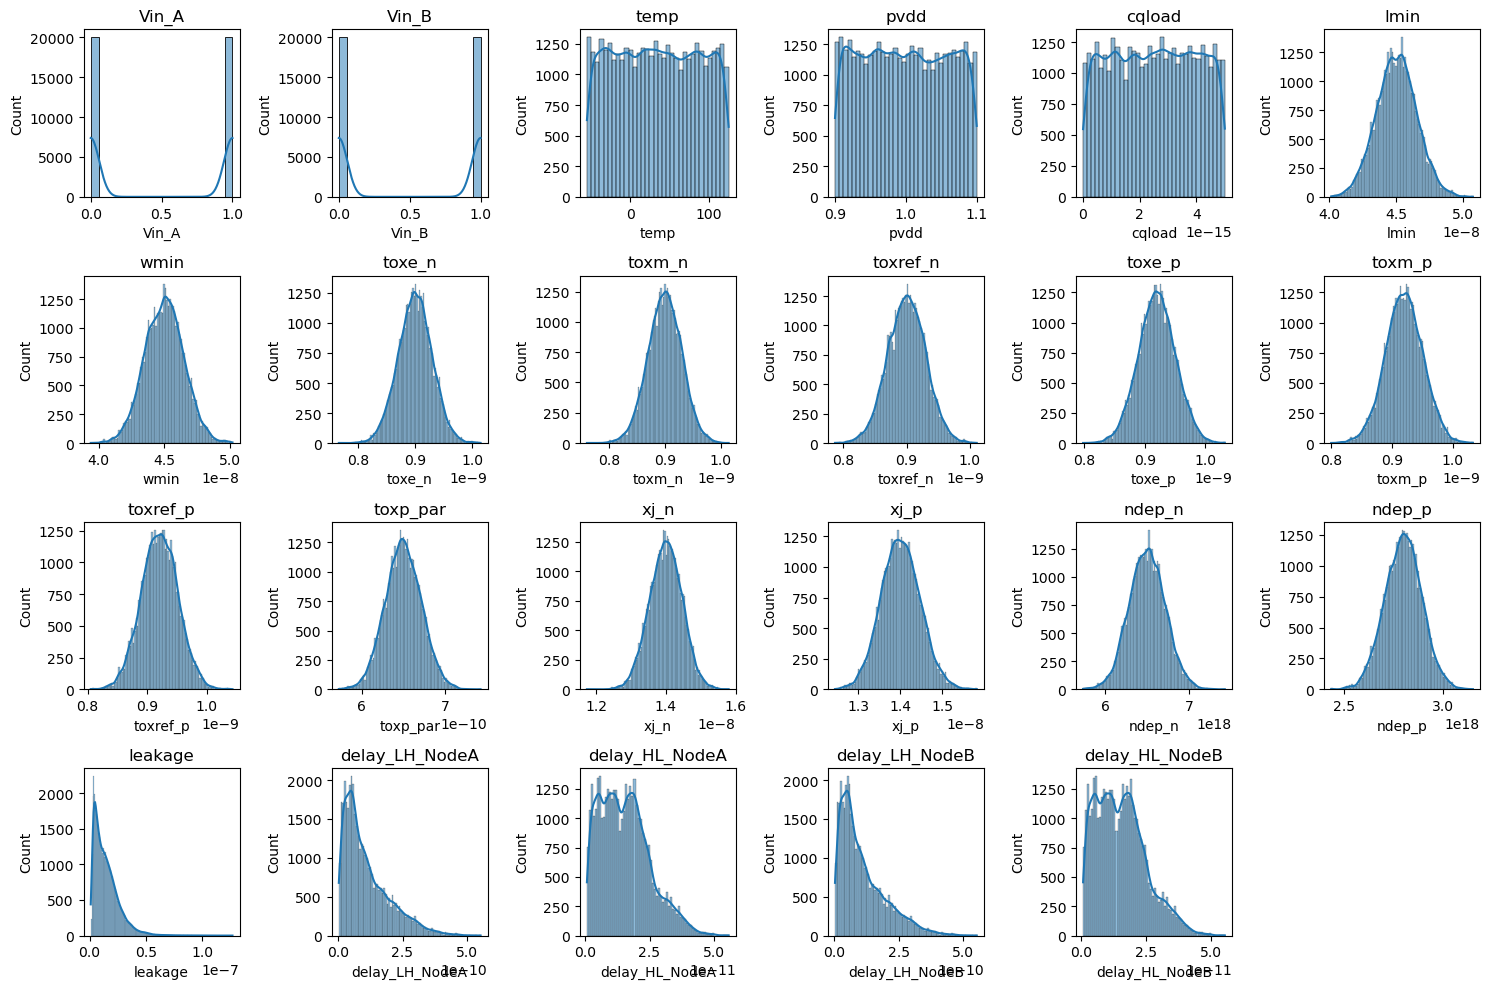

In [14]:
# Histograms of preprocessed data
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns):
    plt.subplot(4, 6, i + 1)
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

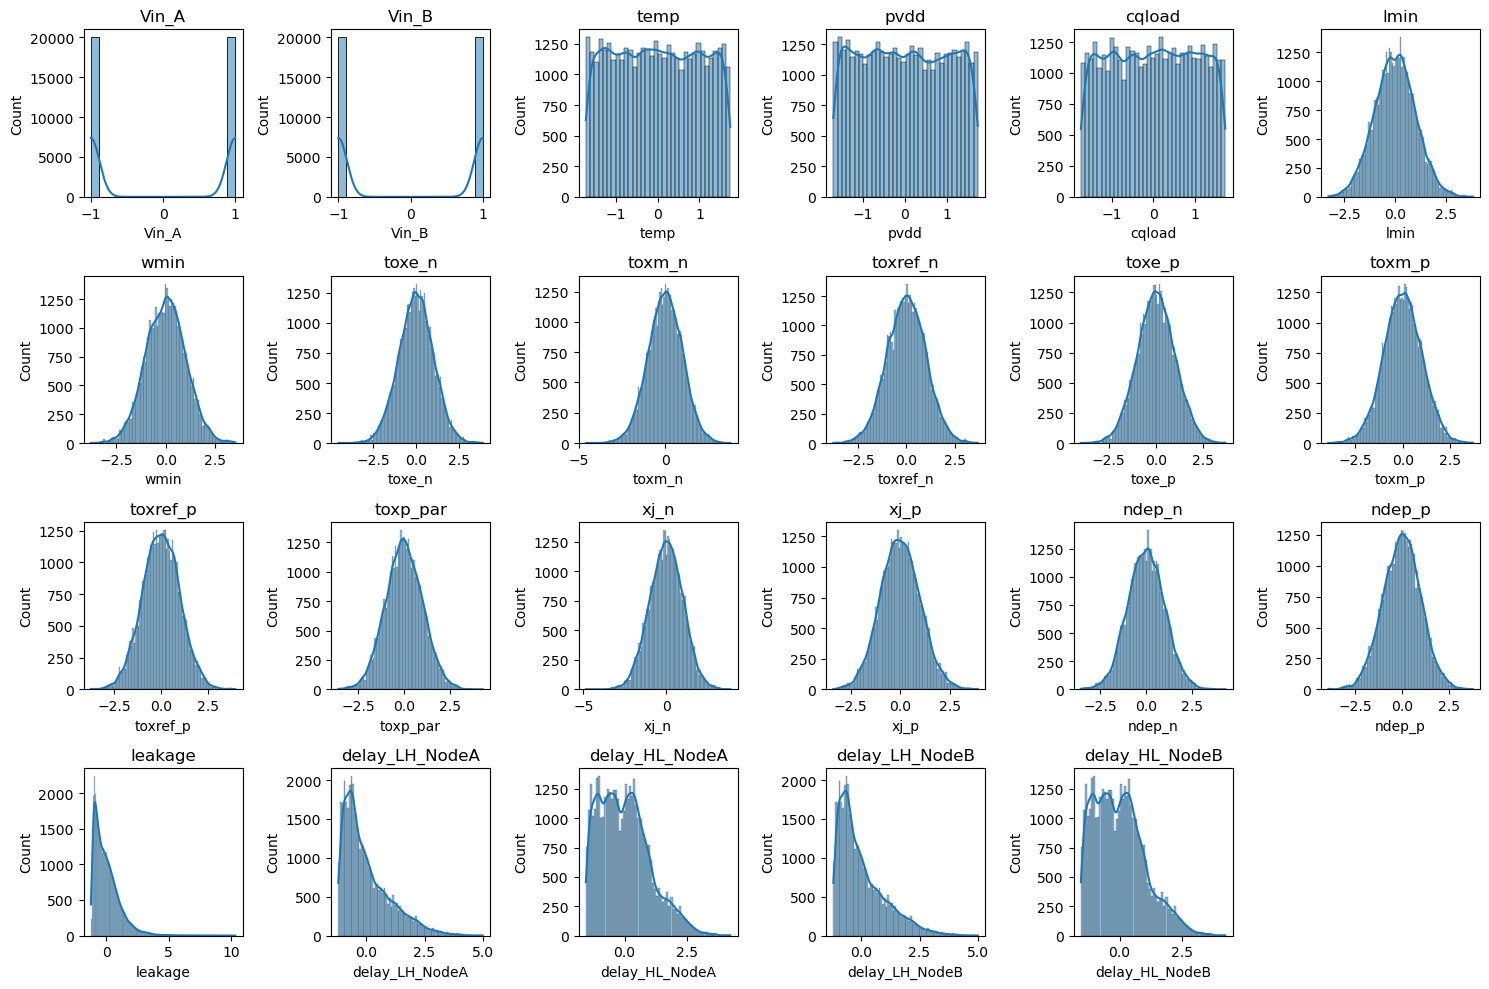

In [15]:
# Histograms of preprocessed scaled_data
plt.figure(figsize=(15, 10))
for i, column in enumerate(scaled_data.columns):
    plt.subplot(4, 6, i + 1)
    sns.histplot(scaled_data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

### Dimensionality Reduction

#### Principal Component Analysis (PCA): Reduce the dimensionality of the dataset while preserving most of the variance

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(scaled_data)

In [17]:
X_pca

array([[-2.79742072,  0.91446883, -0.84319703],
       [-2.80466971,  0.5567069 , -0.72838073],
       [-2.81657045, -1.13923514, -0.92065176],
       ...,
       [ 2.82385328,  0.27229148, -0.28654222],
       [ 2.81107311, -1.4766159 , -0.47893552],
       [ 2.81377866, -1.23484394, -0.36273522]])

In [18]:
pca_df = pd.DataFrame(data=X_pca, columns=[f'PCA_{i+1}' for i in range(X_pca.shape[1])])
pca_df.head()

,PCA_1,PCA_2,PCA_3
0,-2.797421,0.914469,-0.843197
1,-2.804670,0.556707,-0.728381
2,-2.816570,-1.139235,-0.920652
3,-2.813478,-0.874186,-0.804398
4,-0.054691,1.721324,-1.300342


In [19]:
# Print explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

Explained Variance Ratio:
[0.20790968 0.07951461 0.0481549 ]


In [20]:
# Plotting 3D scatter plot using PCA results
from mpl_toolkits.mplot3d import Axes3D

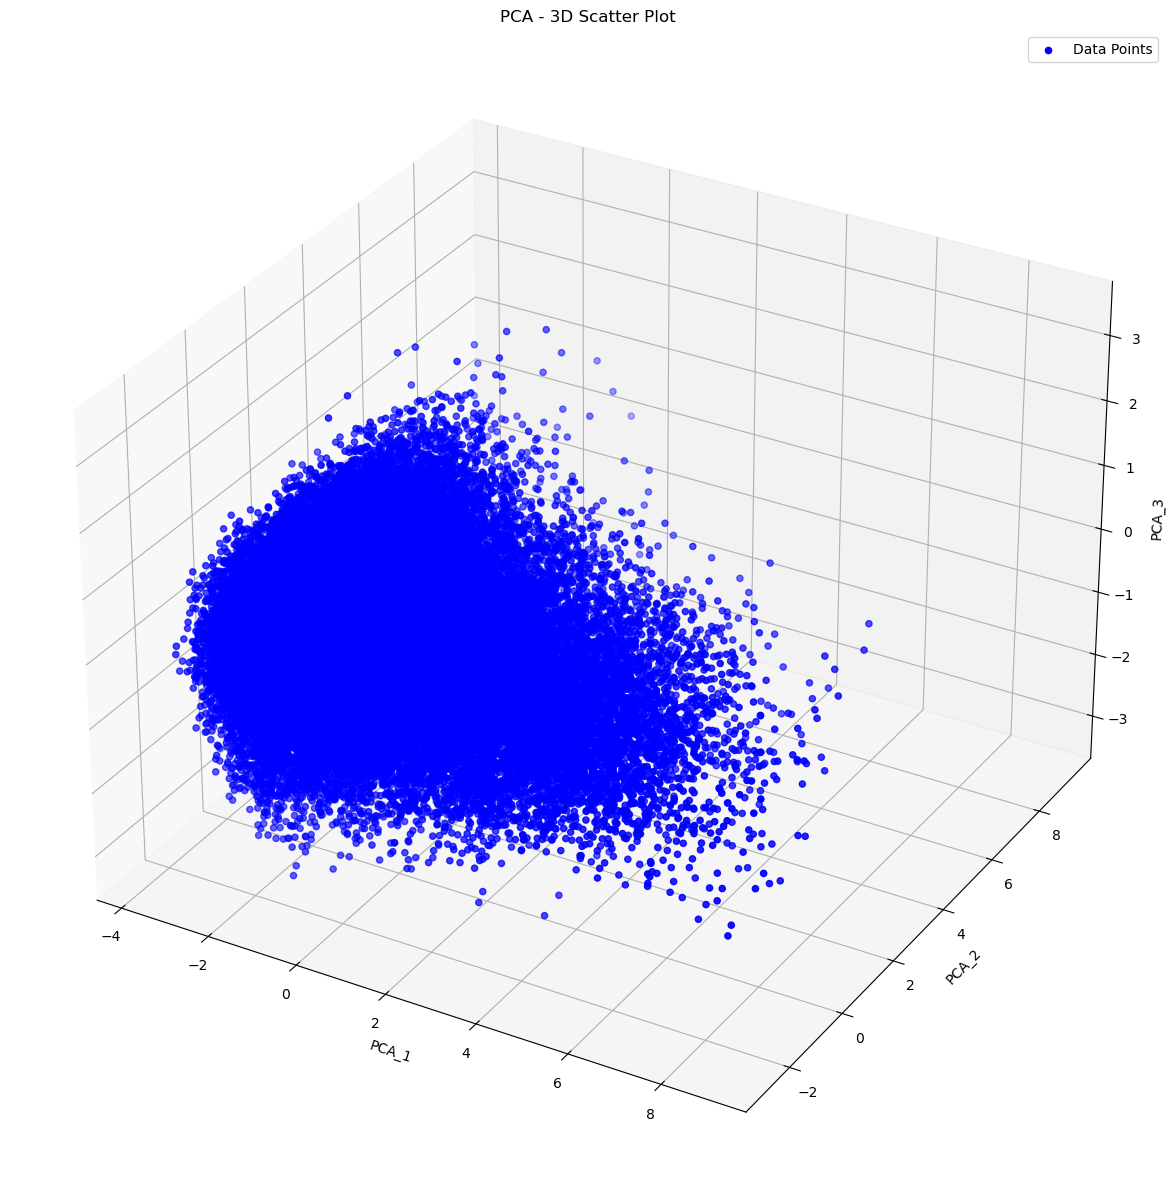

In [21]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Extract the reduced components
x = pca_df['PCA_1']
y = pca_df['PCA_2']
z = pca_df['PCA_3']

# Plot the data points
ax.scatter(x, y, z, c='blue', marker='o', label='Data Points')

# Set labels and title
ax.set_xlabel('PCA_1')
ax.set_ylabel('PCA_2')
ax.set_zlabel('PCA_3')
ax.set_title('PCA - 3D Scatter Plot')

ax.legend()
plt.show()

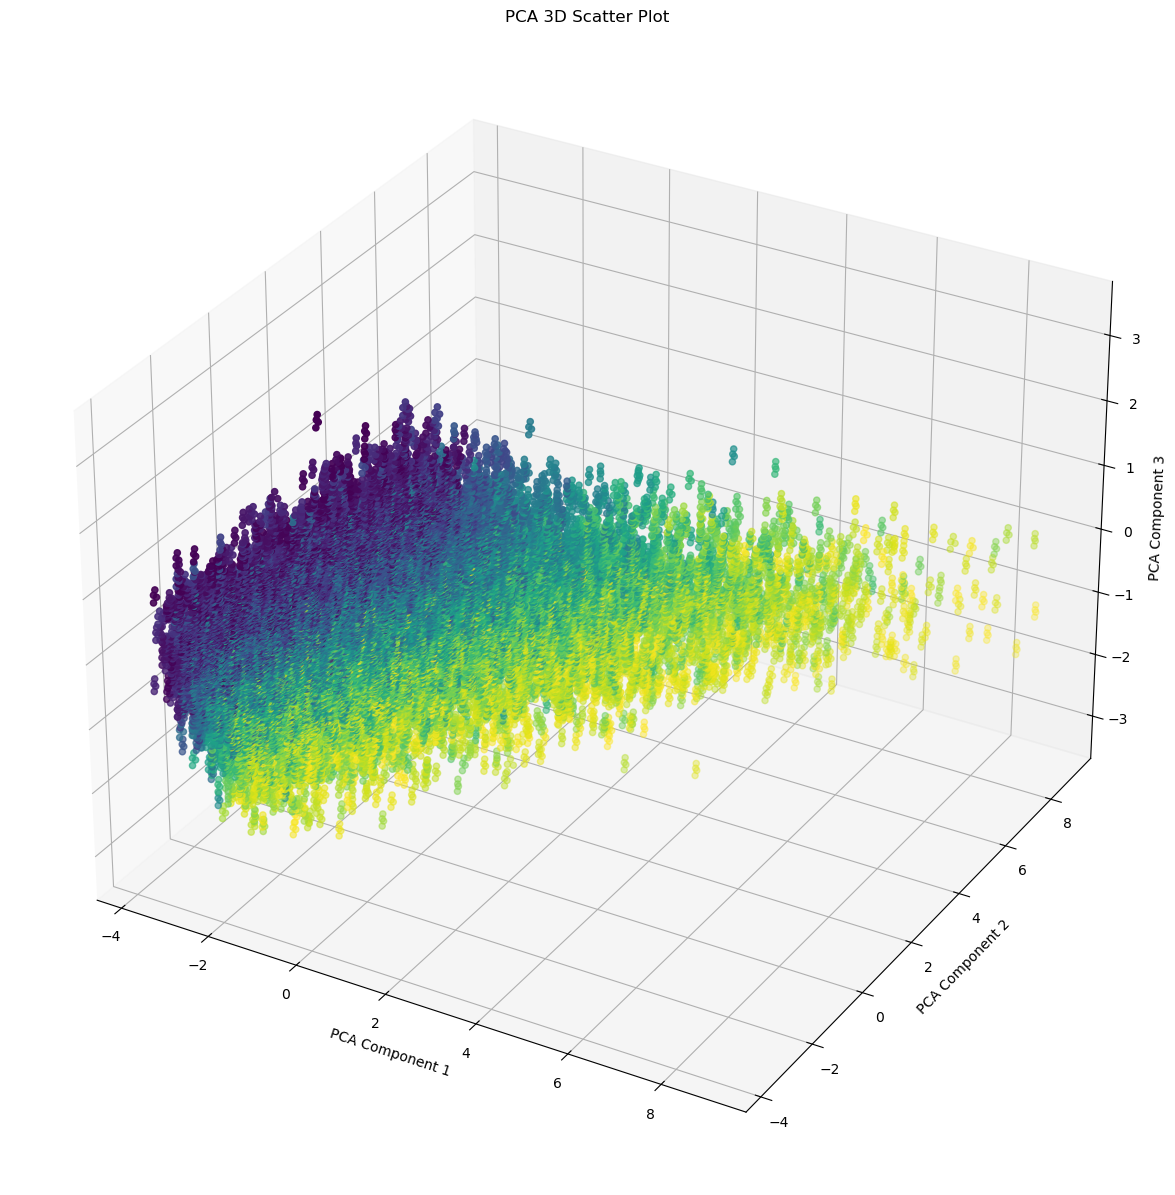

In [22]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PCA_1'], pca_df['PCA_1'], pca_df['PCA_3'], c=data['temp'], cmap='viridis')
ax.set_title('PCA 3D Scatter Plot')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()

### Pattern Mining

#### Explore patterns in the data using Association Rule Mining (Apriori Algorithm)

To preprocess the data for association rule mining with the Apriori algorithm, we need to convert the continuous variables into categorical ones. A simple approach using binning to discretize continuous variables and encoding categorical variables into binary format is used:

In [23]:
from mlxtend.frequent_patterns import apriori, association_rules

# Select only the binary columns for pattern mining
binary_df = data[['Vin_A', 'Vin_B']]

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(binary_df, min_support=0.1, use_colnames=True)

# Find association rules
association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Print association rules
print(association_rules_df)


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


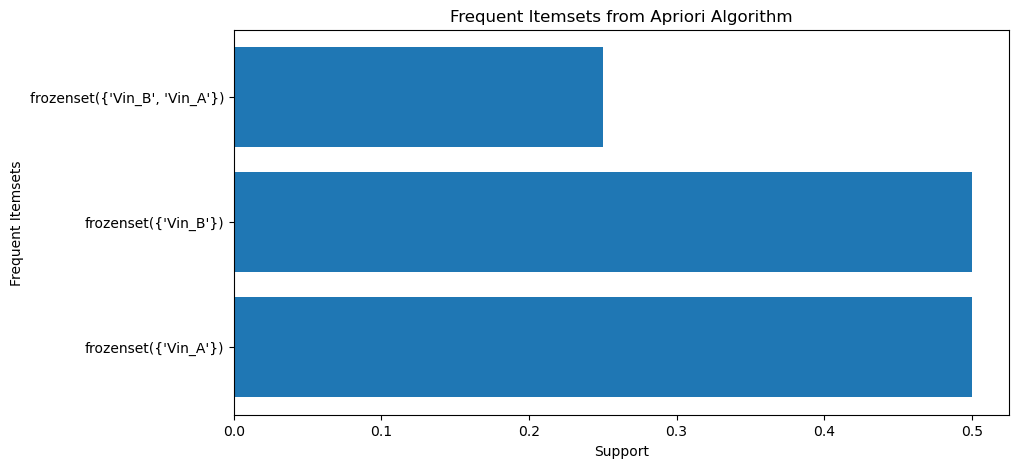

In [24]:
plt.figure(figsize=(10, 5))
plt.barh(range(len(frequent_itemsets)), frequent_itemsets['support'], align='center')
plt.yticks(range(len(frequent_itemsets)), frequent_itemsets['itemsets'], rotation=0)
plt.xlabel('Support')
plt.ylabel('Frequent Itemsets')
plt.title('Frequent Itemsets from Apriori Algorithm')
plt.show()

An empty DataFrame in the context of association rule mining using the Apriori algorithm means that no association rules were found based on the specified minimum support and confidence thresholds.

#### FP Growth Pattern Mining

In [25]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

# FP-Growth algorithm
frequent_itemsets_fp = fpgrowth(binary_df, min_support=0.1, use_colnames=True)

association_rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.7)

print(association_rules_fp)


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


/home/sruj/miniconda3/envs/env/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


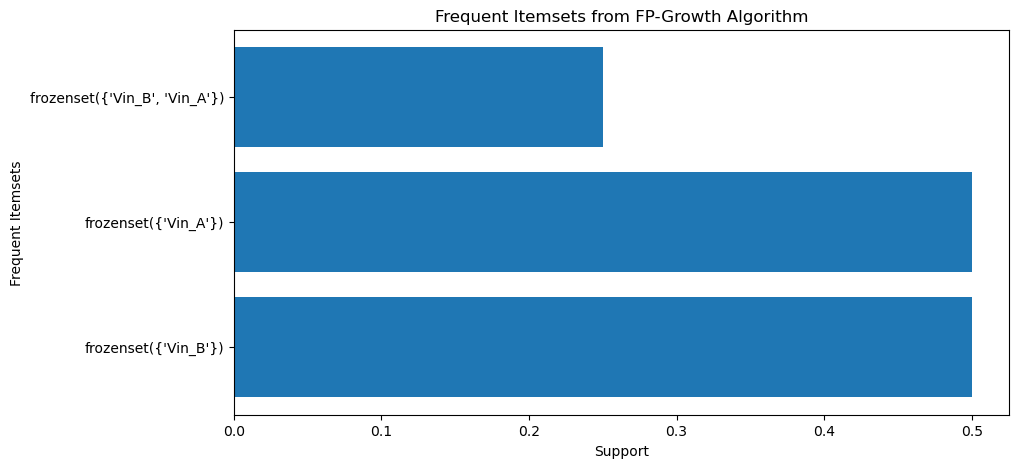

In [26]:
plt.figure(figsize=(10, 5))
plt.barh(range(len(frequent_itemsets_fp)), frequent_itemsets_fp['support'], align='center')
plt.yticks(range(len(frequent_itemsets_fp)), frequent_itemsets_fp['itemsets'], rotation=0)
plt.xlabel('Support')
plt.ylabel('Frequent Itemsets')
plt.title('Frequent Itemsets from FP-Growth Algorithm')
plt.show()

### Regression Analysis


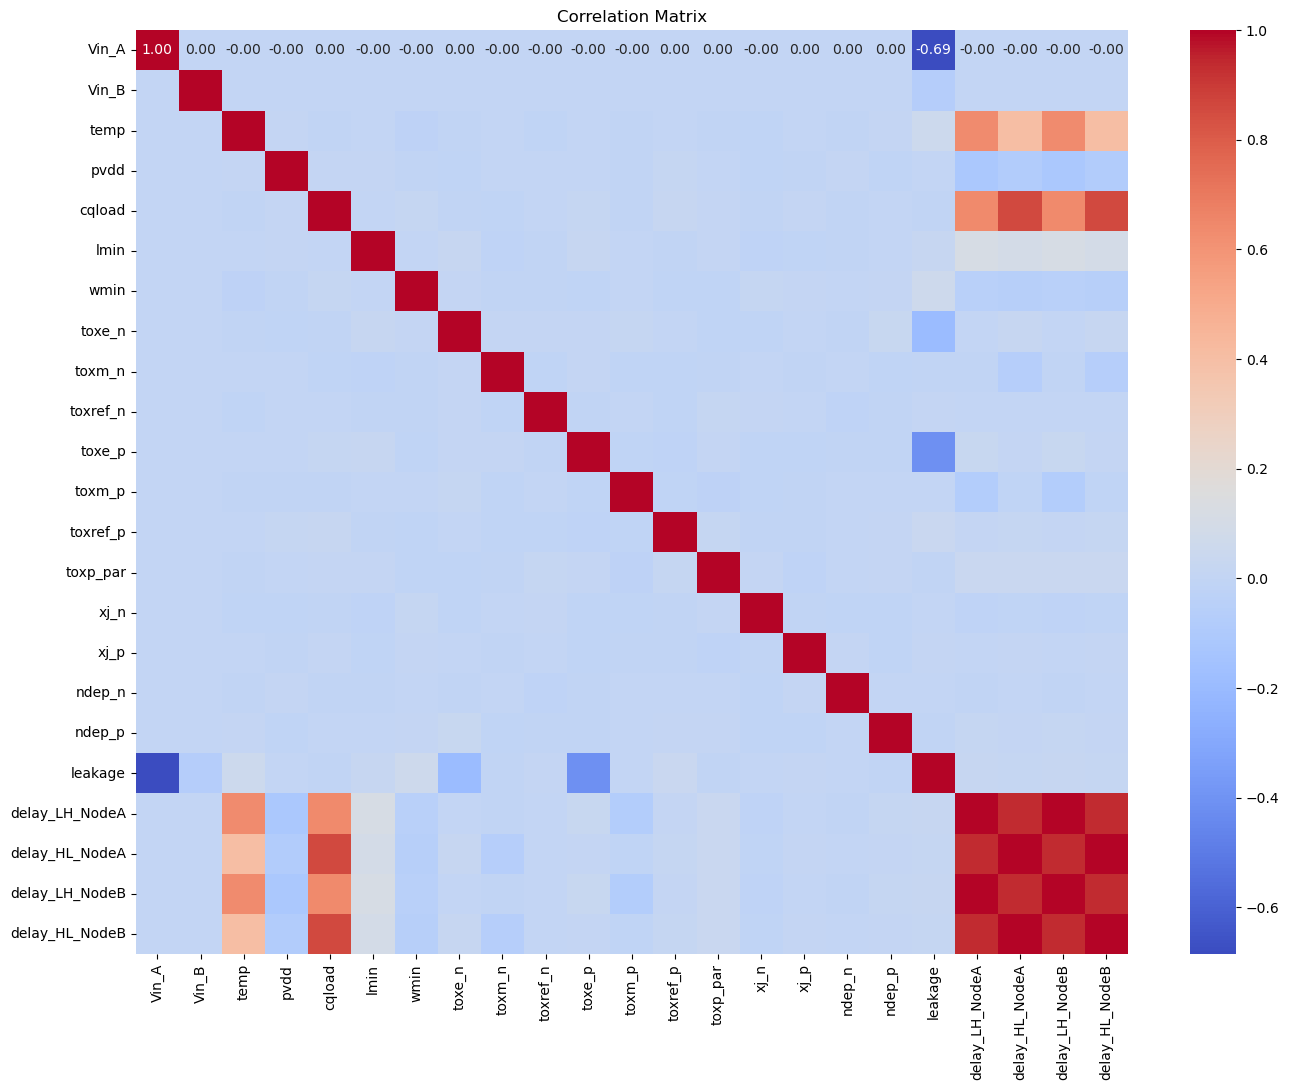

In [27]:
# Correlation analysis
correlation_matrix = scaled_data.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Check for multicollinearity
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

# Selecting only numerical columns for VIF calculation
numerical_features = data.select_dtypes(include=[np.number])

In [29]:
vif = calculate_vif(numerical_features)
vif

,feature,VIF
0,Vin_A,0.999451
1,Vin_B,0.999451
2,temp,1.000074
3,pvdd,0.860147
4,cqload,0.998251
5,lmin,0.664580
6,wmin,0.668378
7,toxe_n,0.674353
8,toxm_n,0.669396
9,toxref_n,0.658606


#### Inferences

The output shows the Variance Inflation Factor (VIF) for each feature in your dataset. The VIF measures how much the variance of an estimated regression coefficient increases if your predictors are correlated.

In this output:

Features with VIF values close to 1 indicate low multicollinearity.
Features with VIF values significantly higher than 1 may have multicollinearity issues.
Based on the provided VIF values:

Columns pvdd, lmin, wmin, toxe_n, toxm_n, toxref_n, toxe_p, toxm_p, toxref_p, toxp_par, xj_n, xj_p, ndep_n, ndep_p, leakage, delay_LH_NodeA, and Vin_A and Vin_B have VIF values close to 1, indicating low multicollinearity.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [31]:
scaled_data.columns

Index(['Vin_A', 'Vin_B', 'temp', 'pvdd', 'cqload', 'lmin', 'wmin', 'toxe_n',
       'toxm_n', 'toxref_n', 'toxe_p', 'toxm_p', 'toxref_p', 'toxp_par',
       'xj_n', 'xj_p', 'ndep_n', 'ndep_p', 'leakage', 'delay_LH_NodeA',
       'delay_HL_NodeA', 'delay_LH_NodeB', 'delay_HL_NodeB'],
      dtype='object')

In [32]:
X = scaled_data.drop(columns=['leakage', 'delay_LH_NodeA',	'delay_HL_NodeA',	'delay_LH_NodeB',	'delay_HL_NodeB'])
y = scaled_data[['leakage', 'delay_LH_NodeA',	'delay_HL_NodeA',	'delay_LH_NodeB',	'delay_HL_NodeB']]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Train a regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1492313080532418


The Mean Squared Error value represents the average squared difference between the actual target values and the predicted values obtained from the regression model. In this case, the MSE value is extremely small which indicates very low error between the predicted and actual values. This suggests that the regression model fits the data very well and has excellent predictive performance.